In [1]:
# 1. 导入库及读取数据
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统黑体
plt.rcParams['axes.unicode_minus'] = False    # 修复负号显示

df = pd.read_csv("US-pumpkins.csv")  # 以pandas库的read_csv函数读取csv文件
df.head()  # 查看前5行数据

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
# 2. 数据基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [3]:
# 3.缺失值检查
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [4]:
# 4.一致性检查
# 发现南瓜的包装方式（称量单位）不统一
print(df["Package"].is_unique)    # False
print(set(df["Package"].tolist()))

False
{'bushel baskets', '22 lb cartons', '1 1/9 bushel cartons', '50 lb sacks', '36 inch bins', '1 1/9 bushel crates', '24 inch bins', '1/2 bushel cartons', 'bushel cartons', '20 lb cartons', '50 lb cartons', 'each', '35 lb cartons', 'bins', '40 lb cartons'}


In [5]:
# 提取本次研究所需要的有价值的特征和标签
features = ['Date', 'City Name', 'Variety', 'Package', 'Low Price', 'High Price']
data = df[features]
print(len(data))    # 1757
print(data.head().to_string())

1757
      Date  City Name      Variety       Package  Low Price  High Price
0  4/29/17  BALTIMORE          NaN  24 inch bins      270.0       280.0
1   5/6/17  BALTIMORE          NaN  24 inch bins      270.0       280.0
2  9/24/16  BALTIMORE  HOWDEN TYPE  24 inch bins      160.0       160.0
3  9/24/16  BALTIMORE  HOWDEN TYPE  24 inch bins      160.0       160.0
4  11/5/16  BALTIMORE  HOWDEN TYPE  24 inch bins       90.0       100.0


In [6]:
# 5.过滤缺失值
# 过滤含有空值的数据
data.dropna(axis=0, how='any', inplace=True)
print(len(data))     # 1752

1752


In [7]:
# 过滤“蒲式耳”单位称量的南瓜数据
data = data[data['Package'].str.contains('bushel', case=True, regex=True)]
print(len(data))     # 415
print(data.head().to_string())

415
       Date  City Name   Variety               Package  Low Price  High Price
70  9/24/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       15.0        15.0
71  9/24/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       18.0        18.0
72  10/1/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       18.0        18.0
73  10/1/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       17.0        17.0
74  10/8/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       15.0        15.0


In [8]:
# 6.数据提取与转化
# 提取月份
data['Month'] = data['Date'].apply(lambda dt: pd.to_datetime(dt).month)
print(data.head().to_string())

# 销售日期转化为该年中的第几天
data['DayOfYear'] = data['Date'].apply(lambda dt: pd.to_datetime(dt).timetuple().tm_yday)
print(data.head().to_string())

# 计算南瓜的平均价格作为标签
data['Price'] = (data['Low Price'] + data['High Price']) / 2
print(data.head().to_string())

       Date  City Name   Variety               Package  Low Price  High Price  Month
70  9/24/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       15.0        15.0      9
71  9/24/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       18.0        18.0      9
72  10/1/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       18.0        18.0     10
73  10/1/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       17.0        17.0     10
74  10/8/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       15.0        15.0     10
       Date  City Name   Variety               Package  Low Price  High Price  Month  DayOfYear
70  9/24/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       15.0        15.0      9        268
71  9/24/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       18.0        18.0      9        268
72  10/1/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       18.0        18.0     10        275
73  10/1/16  BALTIMORE  PIE TYPE  1 1/9 bushel cartons       17.0        17.0     10        275
74  10/8/1

In [9]:
# 根据Package称量单位换算价格Price，转化为每bushel的价格（标准化）
# 1 1/9 bushel cartons => Price = Price/(1 + 1/9)
data.loc[data['Package'].str.contains('1 1/9'), 'Price'] = data['Price']/(1 + 1/9)
# 1/2 bushel cartons => Price = Price/(1/2)
data.loc[data['Package'].str.contains('1/2'), 'Price'] = data['Price']/(1/2)
print(data.head(30).to_string())

         Date  City Name    Variety               Package  Low Price  High Price  Month  DayOfYear   Price
70    9/24/16  BALTIMORE   PIE TYPE  1 1/9 bushel cartons       15.0        15.0      9        268  13.500
71    9/24/16  BALTIMORE   PIE TYPE  1 1/9 bushel cartons       18.0        18.0      9        268  16.200
72    10/1/16  BALTIMORE   PIE TYPE  1 1/9 bushel cartons       18.0        18.0     10        275  16.200
73    10/1/16  BALTIMORE   PIE TYPE  1 1/9 bushel cartons       17.0        17.0     10        275  15.300
74    10/8/16  BALTIMORE   PIE TYPE  1 1/9 bushel cartons       15.0        15.0     10        282  13.500
75    10/8/16  BALTIMORE   PIE TYPE  1 1/9 bushel cartons       18.0        18.0     10        282  16.200
76    10/8/16  BALTIMORE   PIE TYPE  1 1/9 bushel cartons       17.0        17.0     10        282  15.300
77    10/8/16  BALTIMORE   PIE TYPE  1 1/9 bushel cartons       17.0        18.5     10        282  15.975
78   10/15/16  BALTIMORE   PIE TYPE  

In [10]:
# 7.数据整理
# 将整理的数据放到新的DataFrame中
new_features = ['Month', 'DayOfYear', 'City Name', 'Variety', 'Package', 'Price']
new_pumpkins = data[new_features].reset_index(drop='index')
print(len(new_pumpkins))    # 共415条数据

# 删除包含空值的行
new_pumpkins.dropna(inplace=True)
print(len(new_pumpkins))    # 415
print(new_pumpkins.head().to_string())

415
415
   Month  DayOfYear  City Name   Variety               Package  Price
0      9        268  BALTIMORE  PIE TYPE  1 1/9 bushel cartons   13.5
1      9        268  BALTIMORE  PIE TYPE  1 1/9 bushel cartons   16.2
2     10        275  BALTIMORE  PIE TYPE  1 1/9 bushel cartons   16.2
3     10        275  BALTIMORE  PIE TYPE  1 1/9 bushel cartons   15.3
4     10        282  BALTIMORE  PIE TYPE  1 1/9 bushel cartons   13.5


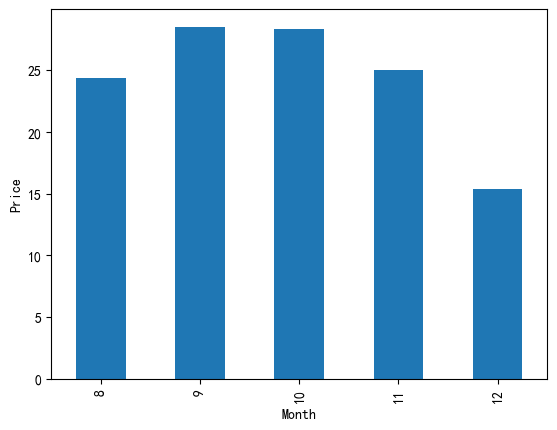

In [11]:
# 8.1 绘制每个月南瓜的平均价格柱状图
new_pumpkins.groupby(by='Month')['Price'].mean().plot(kind='bar')
plt.ylabel('Price')
plt.show()

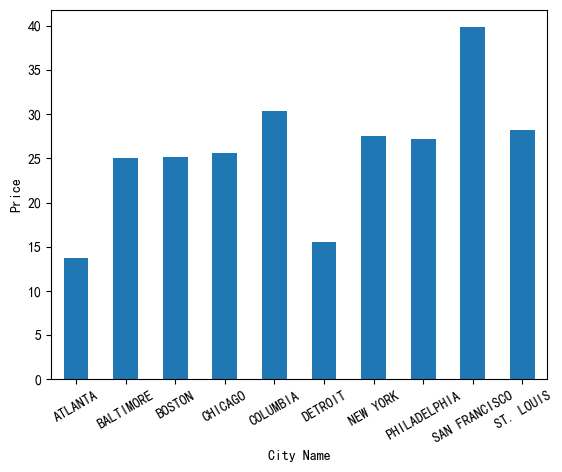

In [12]:
# 8.2 绘制每个城市的南瓜平均价格柱状图
new_pumpkins.groupby(by='City Name')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=30, ha='center')
plt.ylabel('Price')
plt.show()

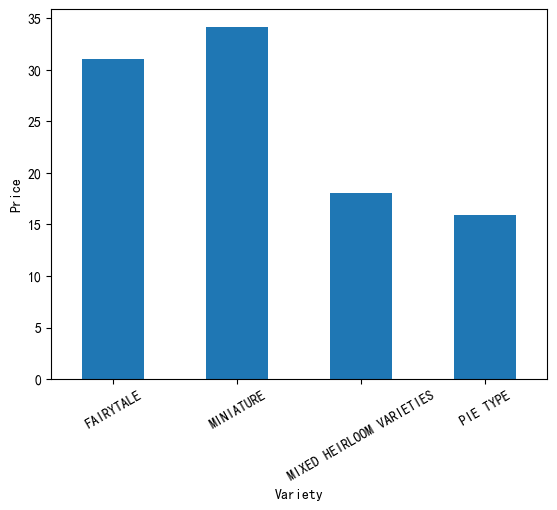

In [13]:
# 8.3 绘制不同品种的南瓜平均价格柱状图
new_pumpkins.groupby(by='Variety')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=30, ha='center')
plt.ylabel('Price')
plt.show()

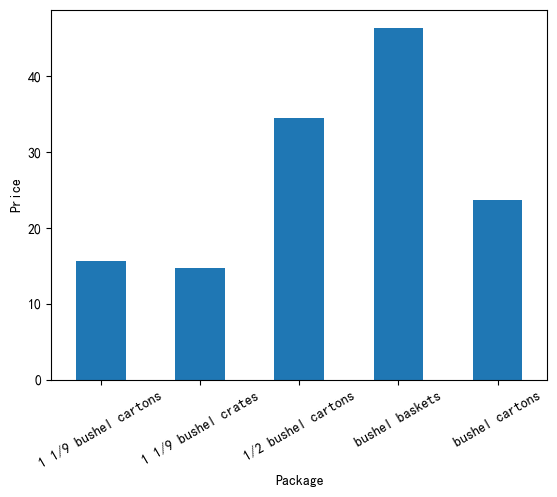

In [14]:
# 8.4 绘制不同包装的南瓜平均价格柱状图
new_pumpkins.groupby(by='Package')['Price'].mean().plot(kind='bar')
plt.xticks(rotation=30, ha='center')
plt.ylabel('Price')
plt.show()

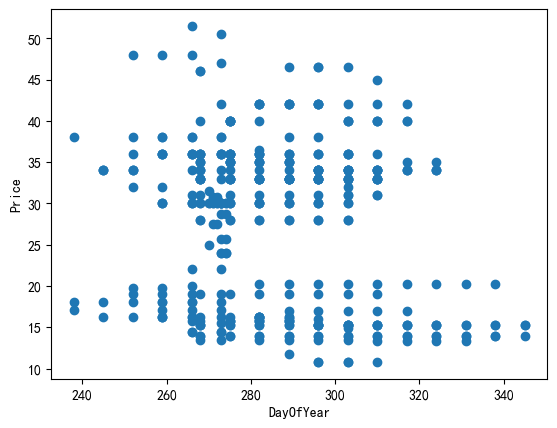

In [15]:
# 8.5 销售日期与价格散点图
plt.scatter('DayOfYear', 'Price', data=new_pumpkins)
plt.xlabel('DayOfYear')
plt.ylabel('Price')
plt.show()

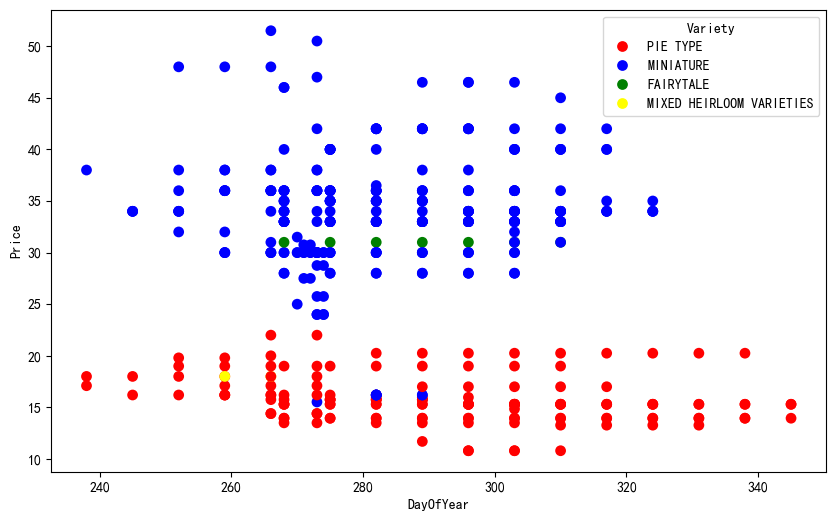

In [16]:
# 8.6 销售日期与价格的散点图，按品种分组着色
# 设置图形大小
plt.figure(figsize=(10, 6))

# 创建颜色映射（确保品种顺序与颜色匹配）
unique_varieties = new_pumpkins['Variety'].unique()
palette = {variety: color for variety, color in zip(unique_varieties, ['red', 'blue', 'green', 'yellow'])}

# 使用Seaborn绘制散点图
ax = sns.scatterplot(
    data=new_pumpkins,
    x='DayOfYear',
    y='Price',
    hue='Variety',          # 按品种分组着色
    palette=palette,        # 自定义颜色映射
    edgecolor='none',       # 移除点边缘线（可选）
    s=60,                   # 调整点大小（可选）
)

# 调整图例位置和标题
ax.legend(title='Variety', loc='best')
plt.show()

回归系数： [-0.06874322]
截距： 47.549980446363556
MSE: 113.62754126951441 RMSE: 10.659622004063484
相关系数： 0.03393110408015798


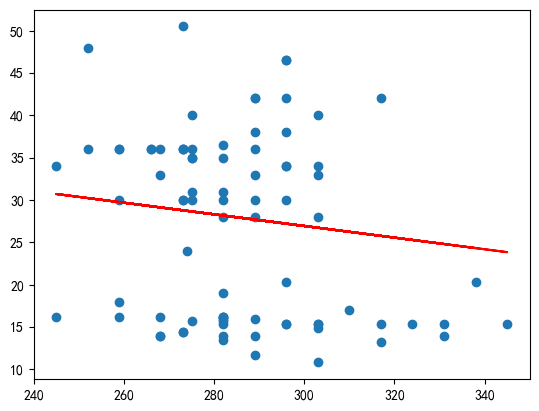

In [17]:
# 9.1 简单线性回归实践
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 销售日期-南瓜价格
# 数据格式转换：将输入值（特征变量）和预期的输出值（预测标签）分离到单独的numpy数组中：
X = new_pumpkins['DayOfYear'].to_numpy().reshape(-1, 1)
y = new_pumpkins['Price']

# 划分数据集：将数据集拆分为训练集和测试集，以便在训练后验证模型
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
# 线性回归训练器
lr = LinearRegression()
# 训练线性回归模型
lr.fit(X_train, y_train)

# 回归系数
print("回归系数：", lr.coef_)         # [-0.06874322]
# 截距
print("截距：", lr.intercept_)    # 47.549980446363556

# 模型评估
y_pred = lr.predict(X_test)
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)    # 113.62754126951441  10.659622004063484
# 计算相关系数
score = lr.score(X_test, y_test)
print("相关系数：", score)        # 0.03393110408015798
# 线性回归可视化
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

In [18]:
# 9.2 南瓜种类-南瓜价格

# 以南瓜的类别作为特征变量，并转化数值类型
# 将南瓜数据被分为4类，每类包含415个样本
X = pd.get_dummies(new_pumpkins['Variety'])
# print(X.info())
y = new_pumpkins['Price']

# 以8:2的比例划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
# 线性回归训练器
lr = LinearRegression()
# 训练线性回归模型
lr.fit(X_train, y_train)
# 将测试集上的预测
y_pred = lr.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)    # 27.621753576504613  5.255640168096044
# 计算相关系数
score = lr.score(X_test, y_test)
print("相关系数：", score)        # 0.765158018180377

MSE: 27.621753576504613 RMSE: 5.255640168096044
相关系数： 0.765158018180377


MSE: 113.21565590044068 RMSE: 10.640284577981957
相关系数： 0.03743298081973112


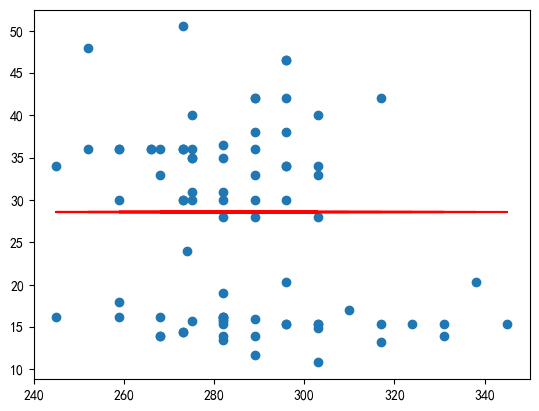

In [19]:
# 10.1 多项式回归实践
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 销售日期-南瓜价格

X = new_pumpkins['DayOfYear'].to_numpy().reshape(-1, 1)
y = new_pumpkins['Price']

# 以8:2的比例划分数据集与训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 构建自动化流程，其中PolynomialFeatures(2)是对输入数据进行2次多项式拟合，后者为构建线性回归模型
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())
# 训练模型
pipe.fit(X_train, y_train)
# 在测试集上预测
y_pred = pipe.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)       # 113.21565590044068 10.640284577981957
# 计算相关系数
score = pipe.score(X_test, y_test)
print("相关系数：", score)        # 0.03743298081973112
# 线性回归可视化
plt.scatter(X_test, y_test)
plt.plot(np.sort(X_test), y_pred[np.argsort(X_test)], color='red')
plt.show()

In [20]:
# 10.2 南瓜种类-南瓜价格

X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

# 以8：2的比例划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 构建自动化流程，其中PolynomialFeatures(2)是对输入数据进行2次多项式拟合，后者为构建线性回归模型
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())
# 训练模型
pipe.fit(X_train, y_train)
# 在测试集上预测
y_pred = pipe.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)       # 27.621753576504588   5.255640168096042
# 计算相关系数
score = pipe.score(X_test, y_test)
print("相关系数：", score)        # 0.7651580181803773

MSE: 27.621753576504588 RMSE: 5.255640168096042
相关系数： 0.7651580181803773


In [ ]:
# 11.1 多元线性回归实践
# 整合多个因子（使用南瓜种类、销售日期、销售地区、称量单位四个一阶特征拟合南瓜价格）
X = pd.get_dummies(new_pumpkins['Variety']).join(new_pumpkins['DayOfYear']).join(pd.get_dummies(new_pumpkins['City Name'])).join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 训练模型
lr = LinearRegression()
lr.fit(X_train, y_train)
# 在测试集上预测
y_pred = lr.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)     # 8.139721848221221  2.8530197770469844
# 计算相关系数
score = lr.score(X_test, y_test)
print("相关系数：", score)        # 0.9307955447143392

MSE: 8.139721848221221 RMSE: 2.853019777046984
相关系数： 0.9307955447143392


In [ ]:
# 11.2 多元线性回归（多项式）
# 使用南瓜种类、月份、销售地区、称量单位四个高阶特征拟合南瓜价格
X = pd.get_dummies(new_pumpkins['Variety']).join(new_pumpkins['Month']).join(pd.get_dummies(new_pumpkins['City Name'])).join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 构建自动化流程，其中PolynomialFeatures(3)是对输入数据进行3次多项式拟合，后者为构建线性回归模型
pipe = make_pipeline(PolynomialFeatures(3), LinearRegression())
# 训练模型
pipe.fit(X_train, y_train)
# 在测试集上预测
y_pred = pipe.predict(X_test)

# 模型评估
# 计算MSE和RMSE指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse, "RMSE:", rmse)     # 4.668807400205255  2.160742326193768
# 计算相关系数
score = pipe.score(X_test, y_test)
print("相关系数：", score)       # 0.960305489672786

MSE: 4.668807400205255 RMSE: 2.160742326193768
相关系数： 0.960305489672786
